<h1>Image Denoising Using AutoEncoders in Keras and Python</h2>

<h2>Task 1: Project Overview</h2>

<h2>Task 2: Import Libraries and Dataset</h2>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h3>load dataset</h3>

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


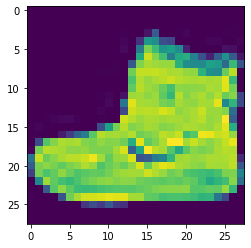

In [ ]:
# visualize original
plt.imshow(x_train[0])

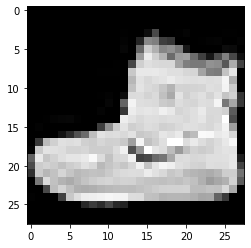

In [ ]:
# gray scale
plt.imshow(x_train[0], cmap = 'gray')

In [ ]:
# check size of training data and output
print( x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
# check the shape of testing data and output
print( x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


<h2>Task 3: Perform Data Visualization</2>

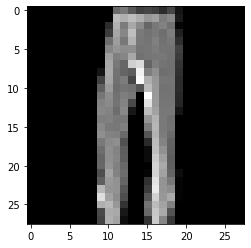

In [ ]:
# visualize random example
i = random.randint(1, 60000)
plt.imshow(x_train[i], cmap = 'gray')

In [ ]:
# show label
label = y_train[i]
label

1

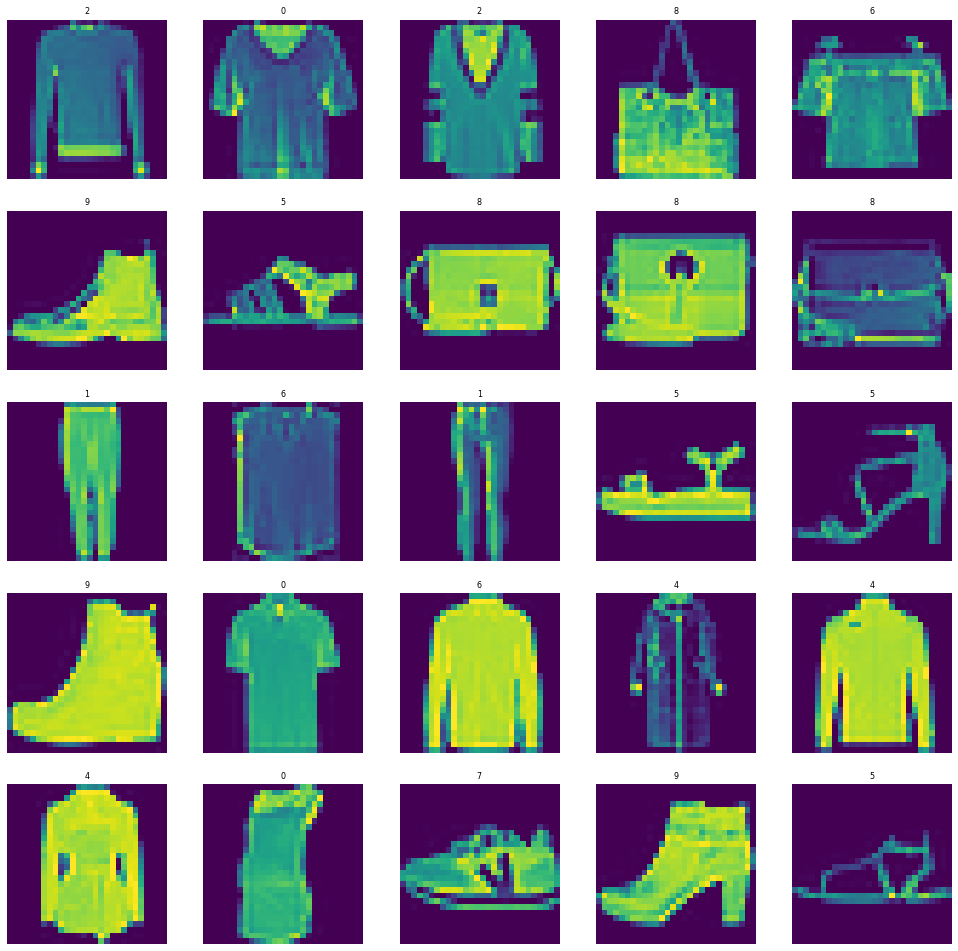

In [ ]:
# view examples in grid format

#define the dimension of the grid
w_grid = 5
l_grid = 5

#fig, axes = plt.subplots(l_grid, w_grid)

# subplot return the figure object and axes object
# axes can be used to plot specific figures at various locations

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))

axes = axes.ravel() # flatten 15x15 matrix into 225 array

n_training = len(x_train) 

# select a random number from 0 to n_training
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off') 

<h2>Task 4: Perform Data Preprocessing<h2>

In [ ]:
# normalize
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# add noise
noise_factor = 0.3
noise_dataset = []

for img in x_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noise_image = np.clip(noisy_image, 0, 1)
  noise_dataset.append(noisy_image)

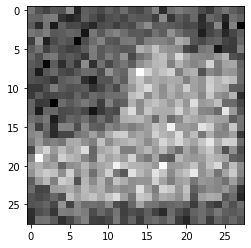

In [ ]:
#i = random.randint(1, len(noise_dataset))
#print(i)
plt.imshow(noise_dataset[0], cmap = 'gray')

In [ ]:
noise_dataset = np.array(noise_dataset)

In [ ]:
# noise test data
noise_factor = 0.3
noise_test = []

for img in x_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noise_image = np.clip(noisy_image, 0, 1)
  noise_test.append(noisy_image)

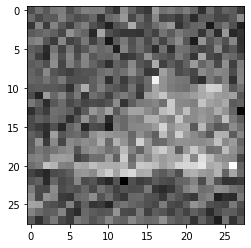

In [ ]:
plt.imshow(noise_test[0], cmap = 'gray')

In [ ]:
noise_test = np.array(noise_test)

<h2>Task 5: Theory and Intuition Behind Autoencoder <h2>

<h2>Task 6: Build and Train Autoencoder Deep Learning Model</h2>

In [ ]:
autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(
    noise_dataset.reshape(-1, 28, 28, 1),
    x_train.reshape(-1, 28, 28, 1),
    epochs = 10,
    batch_size = 200,
    validation_data = (noise_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3865 - val_loss: 0.3197
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3120 - val_loss: 0.3107
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3061 - val_loss: 0.3066
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3031 - val_loss: 0.3044
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3014 - val_loss: 0.3029
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3003 - val_loss: 0.3021
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2996 - val_loss: 0.3015
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2990 - val_loss: 0.3011
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2986 - val_loss: 0.3008
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2983 - val_loss: 0.3005

<h2>Task 7: Evaluate Trained Model Performance</h2>

In [ ]:
evaluation = autoencoder.evaluate(noise_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print('Test Loss: {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.3005
Test Loss: 0.301


In [ ]:
predicted = autoencoder.predict(noise_test[:10].reshape(-1, 28, 28, 1))

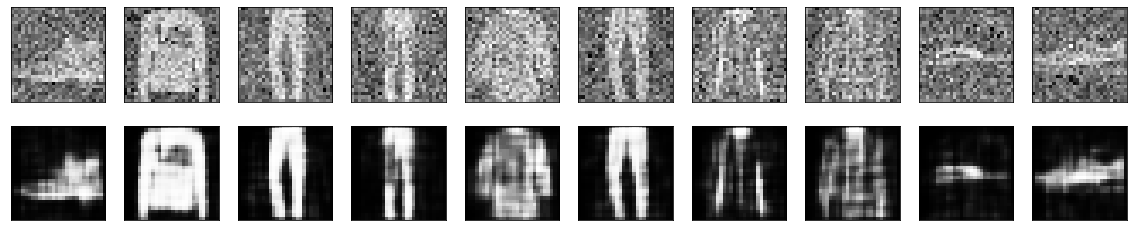

In [ ]:
# show noisy and noiseless images

fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20,4))
for images, row in zip([noise_test[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape(28, 28), cmap = 'Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


<h2>Classes and their labels</h2>
<li>0 = T-shirt/top
<li>1 = Trouser
<li>2 = Pullover
<li>3 = Dress
<li>4 = Coat
<li>5 = Sandal
<li>6 = Shirt
<li>7 = Sneaker
<li>8 = Bag
<li>9 = Ankle boot</li>
